In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from sklearn import tree

# Final Project: Major Features of the Functional Beverage Category

Source: SPINS Syndicated Data
Geography: Natural Channel
Product: Functional Beverages category
Measures: Various Measures
Time Period = Latest 52 Weeks ending 6.18.2019

Description: 3 years worth of UPC-Level grocery scan data of Natural Channel in the CSD and Functional Bev category, searching for what type of machine learning model is best on this dataset and which features are most indicative of the CSD and Functional categories?

Variables/Columns: 'Department', 'Category', 'Subcategory', 'Brand',
       'ALTERNATIVE SWEETENER TYPE', 'BRAND POSITION',
       'CERTIFIED HOWGOOD RATING', 'CERTIFIED NON-GMO PROJECT VERIFIED',
       'COMPANY', 'EQ UNIT SIZE', 'FAIR TRADE', 'FLAVOR',
       'FUNCTIONAL INGREDIENT', 'GRAB N GO', 'LABELED GLUTEN FREE',
       'LABELED NON-GMO', 'LABELED ORGANIC', 'LABELED VEGAN', 'PACK COUNT',
       'PACKAGING TYPE - PRIMARY', 'POSITIONING GROUP', 'PRE AND PROBIOTICS',
       'PRODUCT TYPE', 'RAW', 'SIZE', 'STORAGE', 'Dollars', 'Units',
       'Avg % ACV', 'Max % ACV', 'TDP', 'ARP', '% of Stores Selling',
       'Average Weekly Dollars Per Store Selling Per Item',
       'Average Weekly Units Per Store Selling Per Item']

In [2]:
# Read the csv file into a pandas DataFrame

bev = pd.read_csv('bev4.csv')
bev.head(3)

,Department,Category,Subcategory,Brand,ALTERNATIVE SWEETENER TYPE,BRAND POSITION,CERTIFIED HOWGOOD RATING,CERTIFIED NON-GMO PROJECT VERIFIED,COMPANY,EQ UNIT SIZE,...,STORAGE,Dollars,Units,Avg % ACV,Max % ACV,TDP,ARP,% of Stores Selling,Average Weekly Dollars Per Store Selling Per Item,Average Weekly Units Per Store Selling Per Item
0,REFRIGERATED,REFRIGERATED JUICES & FUNCTIONAL BEVERAGES,RF KOMBUCHA & FERMENTED BEVERAGES,GT KOMBUCHA,NO ALTERNATIVE SWEETENER PRESENCE,NATURAL - STANDARDS,CERTIFIED HOWGOOD RATING - GREAT,NOT CERTIFIED,MILLENNIUM PRODUCTS,16.0,...,REFRIGERATED,6162633.45,2054877.12,97.693077,99.23,99.23,2.999028,98.94,86.236047,28.754668
1,REFRIGERATED,REFRIGERATED JUICES & FUNCTIONAL BEVERAGES,RF KOMBUCHA & FERMENTED BEVERAGES,GT KOMBUCHA,NO ALTERNATIVE SWEETENER PRESENCE,NATURAL - STANDARDS,CERTIFIED HOWGOOD RATING - GREAT,NOT CERTIFIED,MILLENNIUM PRODUCTS,16.0,...,REFRIGERATED,5425731.59,1831126.09,98.577692,99.47,99.47,2.963057,99.21,75.717674,25.553901
2,REFRIGERATED,REFRIGERATED JUICES & FUNCTIONAL BEVERAGES,RF COCONUT & PLANT WATER,HARMLESS HARVEST,NO ALTERNATIVE SWEETENER PRESENCE,NATURAL - STANDARDS,CERTIFIED HOWGOOD RATING - GREAT,NOT CERTIFIED,HARMLESS HARVEST,16.0,...,REFRIGERATED,4583290.02,975425.35,90.987692,95.55,95.55,4.698760,90.19,70.357980,14.973732


In [3]:
#Column Names
bev.columns

Index(['Department', 'Category', 'Subcategory', 'Brand',
       'ALTERNATIVE SWEETENER TYPE', 'BRAND POSITION',
       'CERTIFIED HOWGOOD RATING', 'CERTIFIED NON-GMO PROJECT VERIFIED',
       'COMPANY', 'EQ UNIT SIZE', 'FAIR TRADE', 'FLAVOR',
       'FUNCTIONAL INGREDIENT', 'GRAB N GO', 'LABELED GLUTEN FREE',
       'LABELED NON-GMO', 'LABELED ORGANIC', 'LABELED VEGAN', 'PACK COUNT',
       'PACKAGING TYPE - PRIMARY', 'POSITIONING GROUP', 'PRE AND PROBIOTICS',
       'PRODUCT TYPE', 'RAW', 'SIZE', 'STORAGE', 'Dollars', 'Units',
       'Avg % ACV', 'Max % ACV', 'TDP', 'ARP', '% of Stores Selling',
       'Average Weekly Dollars Per Store Selling Per Item',
       'Average Weekly Units Per Store Selling Per Item'],
      dtype='object')

In [4]:
#Column Types
bev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 35 columns):
Department                                           3601 non-null object
Category                                             3601 non-null object
Subcategory                                          3601 non-null object
Brand                                                3601 non-null object
ALTERNATIVE SWEETENER TYPE                           3601 non-null object
BRAND POSITION                                       3601 non-null object
CERTIFIED HOWGOOD RATING                             3601 non-null object
CERTIFIED NON-GMO PROJECT VERIFIED                   3601 non-null object
COMPANY                                              3601 non-null object
EQ UNIT SIZE                                         3601 non-null float64
FAIR TRADE                                           3601 non-null object
FLAVOR                                               3601 non-null object
FUNC

In [5]:
# Stat sheet
bev.describe()

,EQ UNIT SIZE,PACK COUNT,SIZE,Dollars,Units,Avg % ACV,Max % ACV,TDP,ARP,% of Stores Selling,Average Weekly Dollars Per Store Selling Per Item,Average Weekly Units Per Store Selling Per Item
count,3601.000000,3588.000000,3601.000000,3.601000e+03,3.601000e+03,3597.000000,3601.000000,3601.000000,3601.000000,3601.000000,3597.000000,3597.000000
mean,26.523019,1.007804,26.523019,7.399406e+04,2.031664e+04,5.013784,7.092927,7.092927,5.031866,5.990497,20.925620,4.707703
std,30.329748,0.337995,30.329748,3.039820e+05,8.788144e+04,12.902038,15.829887,15.829887,4.648010,13.695330,33.393957,6.774601
min,0.500000,1.000000,0.500000,-2.231000e+01,-1.067000e+01,0.020000,0.000000,0.000000,0.489948,0.110000,0.857970,0.172525
25%,12.000000,1.000000,12.000000,1.291450e+03,3.052900e+02,0.185714,0.270000,0.270000,3.186047,0.270000,6.264103,1.471707
50%,16.000000,1.000000,16.000000,5.692200e+03,1.256720e+03,0.528462,0.920000,0.920000,3.913712,0.790000,12.233483,2.780085
75%,32.000000,1.000000,32.000000,2.772429e+04,6.511860e+03,2.325833,4.040000,4.040000,5.294025,3.500000,22.592564,5.360654
max,340.000000,18.000000,340.000000,6.162633e+06,2.054877e+06,98.577692,99.470000,99.470000,129.773214,99.210000,671.408413,104.095220


In [6]:
# # Check share of each measure feature by column
# name = list(bev.columns.values)

# for x in name:
#     group = bev.groupby(x)
#     count = group[x].count()
#     count = count.sort_values(ascending=False)
#     total = count.sum()
#     print(group, count/total*100)

In [7]:
# bev.info()
bev['Category'].unique()
bev.shape
# We have 35 features and 3601 instances

(3601, 35)

In [8]:
bev.corr()

,EQ UNIT SIZE,PACK COUNT,SIZE,Dollars,Units,Avg % ACV,Max % ACV,TDP,ARP,% of Stores Selling,Average Weekly Dollars Per Store Selling Per Item,Average Weekly Units Per Store Selling Per Item
EQ UNIT SIZE,1.000000,0.137447,1.000000,-0.013144,-0.038717,-0.053616,-0.062615,-0.062615,0.505290,-0.066621,0.147096,0.028027
PACK COUNT,0.137447,1.000000,0.137447,-0.005560,-0.005342,-0.008488,-0.009800,-0.009800,0.433289,-0.009789,0.046963,-0.013137
SIZE,1.000000,0.137447,1.000000,-0.013144,-0.038717,-0.053616,-0.062615,-0.062615,0.505290,-0.066621,0.147096,0.028027
Dollars,-0.013144,-0.005560,-0.013144,1.000000,0.946934,0.814704,0.744499,0.744499,-0.038579,0.786731,0.096529,0.135039
Units,-0.038717,-0.005342,-0.038717,0.946934,1.000000,0.817358,0.734949,0.734949,-0.069146,0.783065,0.068569,0.141515
Avg % ACV,-0.053616,-0.008488,-0.053616,0.814704,0.817358,1.000000,0.960228,0.960228,-0.090859,0.962943,-0.003102,0.053866
Max % ACV,-0.062615,-0.009800,-0.062615,0.744499,0.734949,0.960228,1.000000,1.000000,-0.096323,0.986835,-0.039809,0.008939
TDP,-0.062615,-0.009800,-0.062615,0.744499,0.734949,0.960228,1.000000,1.000000,-0.096323,0.986835,-0.039809,0.008939
ARP,0.505290,0.433289,0.505290,-0.038579,-0.069146,-0.090859,-0.096323,-0.096323,1.000000,-0.099208,0.156292,-0.087712
% of Stores Selling,-0.066621,-0.009789,-0.066621,0.786731,0.783065,0.962943,0.986835,0.986835,-0.099208,1.000000,-0.036061,0.016872


# PCA / K Means Test

In [9]:
# We can see that the dataset has values in strings.
# We need to convert all the unique values to integers.
# Thus we perform label encoding on the data.

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in bev.columns:
    bev[col] = labelencoder.fit_transform(bev[col])

In [10]:
bev['FLAVOR'].unique()

array([25, 10, 51, 23,  3, 39, 61, 18, 29, 32, 47, 45, 52, 22, 14, 57, 13,
       46, 42, 35, 30, 55, 54, 27, 41, 63, 21, 12,  1, 53, 62, 59, 28, 17,
       24, 60, 16, 49, 48, 36, 37,  5, 15, 11, 38, 33,  2,  4, 64,  0, 50,
        8, 34, 31, 19,  9, 65, 56, 20, 58, 43, 40,  6,  7, 26, 44],
      dtype=int64)

In [74]:
# Seperating features and label

X = bev.iloc[:,3:35]  # all rows, all the features and no labels
y = bev.iloc[:, 2]  # all rows, label only

In [75]:
bev.head(5)

,Department,Category,Subcategory,Brand,ALTERNATIVE SWEETENER TYPE,BRAND POSITION,CERTIFIED HOWGOOD RATING,CERTIFIED NON-GMO PROJECT VERIFIED,COMPANY,EQ UNIT SIZE,...,STORAGE,Dollars,Units,Avg % ACV,Max % ACV,TDP,ARP,% of Stores Selling,Average Weekly Dollars Per Store Selling Per Item,Average Weekly Units Per Store Selling Per Item
0,0,0,3,185,4,3,2,1,310,39,...,1,3588,3508,2503,1109,1109,742,1045,3469,3470
1,0,0,3,185,4,3,2,1,310,39,...,1,3587,3507,2504,1110,1110,670,1046,3444,3457
2,0,0,0,192,4,3,2,1,185,39,...,1,3586,3504,2500,1106,1106,2436,1038,3430,3361
3,0,0,0,192,4,3,2,1,185,55,...,1,3585,3479,2462,1062,1062,3344,992,3490,3189
4,0,0,3,185,4,3,2,1,310,64,...,1,3584,3486,2485,1086,1086,3172,1023,3419,3116


Text(0.5, 1, 'Correlation between different features')

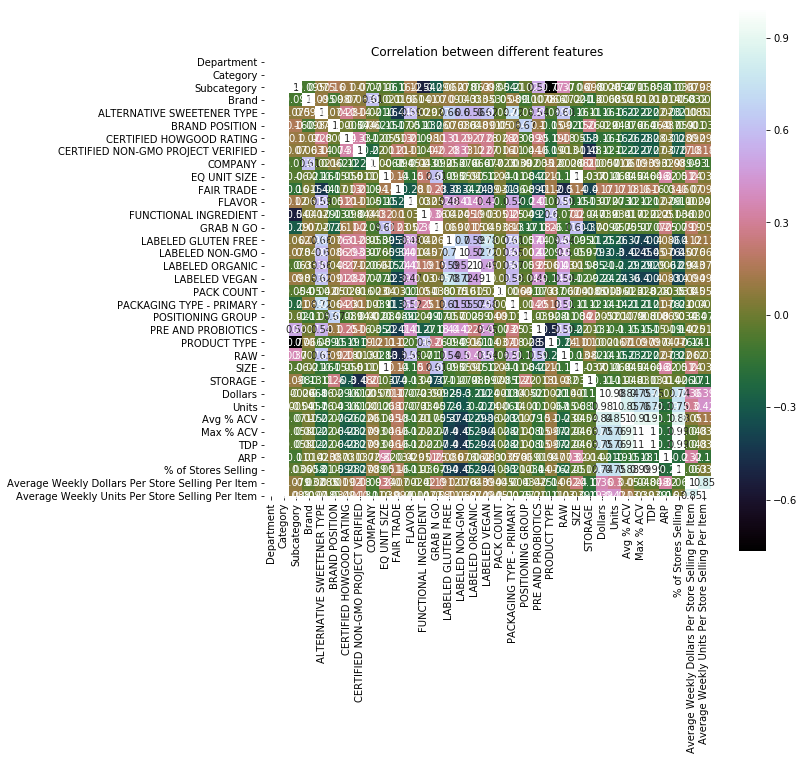

In [13]:
correlation = bev.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [53]:
# Standardise Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.07694393, -0.62594454, -0.73697303, ...,  3.00596408,
         1.61163347,  1.6960495 ],
       [ 1.07694393, -0.62594454, -0.73697303, ...,  3.00954304,
         1.58754613,  1.68334131],
       [-1.97906482, -0.58327035, -0.73697303, ...,  2.98091132,
         1.57405722,  1.58949623],
       ...,
       [-1.97906482,  1.71503954, -0.73697303, ..., -0.73047566,
         1.73207017,  1.7459047 ],
       [ 1.07694393,  0.05684249,  0.78804702, ..., -0.72689669,
         1.73014319,  1.7439496 ],
       [ 0.05827435,  1.46509072, -0.73697303, ..., -0.71258083,
         1.73303367,  1.74688226]])

In [15]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 5.73073095e+00,  3.73654507e+00,  3.07282232e-01, ...,
         6.90456697e-03, -2.40395822e-15, -1.47131775e-16],
       [ 5.87388676e+00,  3.58639446e+00,  1.94312740e-01, ...,
         1.15304635e-02, -7.12893442e-16, -7.46706735e-17],
       [ 5.26817447e+00,  2.91634750e+00,  1.59177594e+00, ...,
        -8.56432182e-02,  3.96191122e-16, -1.42051047e-17],
       ...,
       [ 1.56477689e+00, -3.66873210e+00,  8.55551677e-01, ...,
        -5.51157725e-02, -8.51420168e-16,  3.31395905e-16],
       [-2.78875507e-01, -1.33426870e+00,  6.29098543e-01, ...,
         1.01052191e-01,  1.25189288e-15, -2.65122292e-16],
       [ 1.48831811e-01, -2.79998095e+00,  1.90969468e+00, ...,
        -4.68844277e-02, -2.52626847e-16,  2.76944703e-16]])

In [16]:
covariance=pca.get_covariance()
covariance

array([[ 1.00027778, -0.09492485,  0.07532296, ..., -0.03629467,
         0.07887904,  0.08786832],
       [-0.09492485,  1.00027778,  0.09523474, ...,  0.0058463 ,
        -0.03182456, -0.00972069],
       [ 0.07532296,  0.09523474,  1.00027778, ..., -0.20721868,
         0.00851051,  0.01830518],
       ...,
       [-0.03629467,  0.0058463 , -0.20721868, ...,  1.00027778,
        -0.06313503,  0.03186897],
       [ 0.07887904, -0.03182456,  0.00851051, ..., -0.06313503,
         1.00027778,  0.84648093],
       [ 0.08786832, -0.00972069,  0.01830518, ...,  0.03186897,
         0.84648093,  1.00027778]])

In [17]:
explained_variance=pca.explained_variance_
explained_variance

array([7.66415583e+00, 4.09687890e+00, 3.43892273e+00, 2.74396984e+00,
       2.05592786e+00, 1.80737933e+00, 1.53792908e+00, 1.32517734e+00,
       1.00545359e+00, 8.74715691e-01, 7.42967753e-01, 6.43781099e-01,
       5.46389208e-01, 5.00702667e-01, 4.61969809e-01, 4.18580650e-01,
       3.65685809e-01, 3.43424892e-01, 3.30830392e-01, 3.04495689e-01,
       2.92301735e-01, 2.87556443e-01, 2.64026357e-01, 2.55073101e-01,
       2.04663734e-01, 1.88732932e-01, 1.61584318e-01, 9.76838132e-02,
       3.05029099e-02, 1.21943341e-02, 5.50883388e-03, 1.51148823e-30,
       3.71887618e-32])

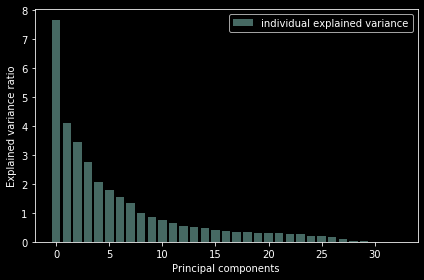

In [18]:
with plt.style.context('dark_background'):
    plt.bar(range(33), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

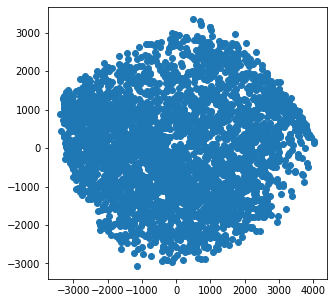

In [28]:
N=bev.values
pca = PCA(n_components=33)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

In [29]:
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.11757920e-01, 2.72554167e-01, 1.75631791e-01, 1.94450945e-02,
       6.82398437e-03, 5.75609292e-03, 5.17137124e-03, 1.50724635e-03,
       9.56153517e-04, 1.71861534e-04, 1.13584219e-04, 6.03510750e-05,
       4.11933450e-05, 5.15553130e-06, 1.69191684e-06, 5.47708029e-07,
       4.04662114e-07, 3.25247767e-07, 2.22558269e-07, 1.85497495e-07,
       1.49328916e-07, 1.21922962e-07, 9.67468576e-08, 7.15682493e-08,
       5.39162588e-08, 4.55612516e-08, 4.15747100e-08, 3.80742233e-08,
       1.85262824e-08, 1.49625344e-08, 3.87212470e-09, 1.01043386e-31,
       4.68601004e-33])

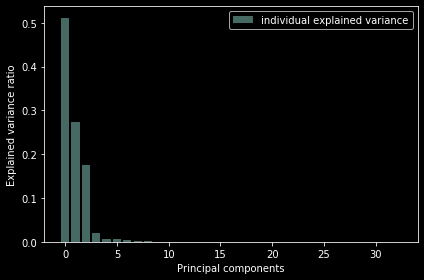

In [47]:
with plt.style.context('dark_background'):
    plt.bar(range(33), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

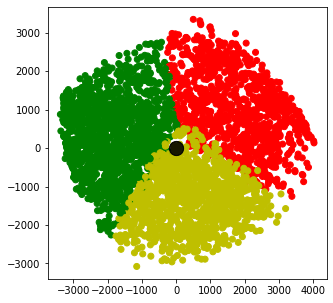

<bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)>

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=5)
X_clustered = kmeans.fit_predict(N)
centers = kmeans.cluster_centers_

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r',
                   3 : 'b'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
plt.show()

kmeans.predict

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9900110987791343

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

feature_names = X.columns

In [79]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3368607458797606, 'PRODUCT TYPE'),
 (0.11647079389822763, 'FUNCTIONAL INGREDIENT'),
 (0.08827736032782377, 'PRE AND PROBIOTICS'),
 (0.08602250742812188, 'RAW'),
 (0.056458098408038844, 'PACKAGING TYPE - PRIMARY'),
 (0.035741004578595206, 'GRAB N GO'),
 (0.0283270366651892, 'FLAVOR'),
 (0.022982510288197075, 'EQ UNIT SIZE'),
 (0.02011967973960783, 'BRAND POSITION'),
 (0.01999217570857075, 'SIZE'),
 (0.0183932751480147, 'POSITIONING GROUP'),
 (0.018355078851183752, 'ARP'),
 (0.01629897764670748, 'Brand'),
 (0.013167849096671893, 'FAIR TRADE'),
 (0.011975509791209153, 'COMPANY'),
 (0.010121840827345636, 'Average Weekly Dollars Per Store Selling Per Item'),
 (0.009877966949175736, 'Units'),
 (0.009433495855138285, '% of Stores Selling'),
 (0.008974232686886645, 'Dollars'),
 (0.008872399984516234, 'Average Weekly Units Per Store Selling Per Item'),
 (0.00883518087549353, 'Max % ACV'),
 (0.008730649584533824, 'Avg % ACV'),
 (0.007837441369682448, 'CERTIFIED HOWGOOD RATING'),
 (0.00756168